# Part 2

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error

### Loading the iris dataset using pandas

In [105]:
diabetes_rf = pd.read_csv('diabetes.csv')

## Q1 General analysis

In [106]:
print("Features: ")
print(list(diabetes_rf.columns))

print("Sample: ")
print(diabetes_rf.head())

print("Ranges & Scales: ")
diabetes_rf.describe()

Features: 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Sample: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Ranges & Scales: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Q2 Test Train split

In [139]:
def linear_regressor_mean(dataset, test_size_ratio):
  train, test = train_test_split(dataset, test_size=test_size_ratio)
  train_x = train.iloc[:, :-1]
  train_y = train.iloc[:, -1]
  test_x = test.iloc[:, :-1]
  test_y = test.iloc[:, -1]

  reg = LinearRegression().fit(train_x, train_y.values.ravel())
  predictions = [round(pred) for pred in reg.predict(test_x)]
  mar = mean_absolute_error(y_true=test_y.values.ravel(), y_pred=predictions)
  return mar

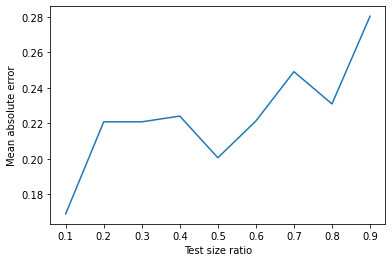

In [203]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [linear_regressor_mean(dataset=diabetes_rf, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Mean absolute error')
plt.show()

## Q3 Naive k-features selection

In [204]:
def naive_k_features(k, train_set, test_set):

  def fit_linear(train_x, train_y, test_x, test_y):
      reg = LinearRegression().fit(train_x, train_y.values.ravel())
      predictions = [round(pred) for pred in reg.predict(test_x)]
      mar = mean_absolute_error(y_true=test_y.values.ravel(), y_pred=predictions)
      return mar
  
  learnable_columns = diabetes_rf.columns[:-1]
  classes_column = list(diabetes_rf.columns[-1:])
  k_columns = [list(columns) for columns in list(combinations(learnable_columns, k))]
  ma_errors = [fit_linear(train_set[columns], train_set[classes_column], test_set[columns], test_set[classes_column]) for columns in k_columns]

  return k_columns[np.argmin(ma_errors)]

In [208]:
# Running the function we defined with k=2

train_set, test_set = train_test_split(diabetes_rf, test_size=0.8)

print("The best mininmal 2 absolute error columns are:")
print(naive_k_features(k=2, train_set=train_set, test_set=test_set))


print("The best mininmal 5 absolute error columns are:")
print(naive_k_features(k=5, train_set=train_set, test_set=test_set))

The best mininmal 2 absolute error columns are:
['Glucose', 'DiabetesPedigreeFunction']
The best mininmal 5 absolute error columns are:
['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
